In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Loading Dataset:

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Visualization

Text(0.5, 0, 'Age')

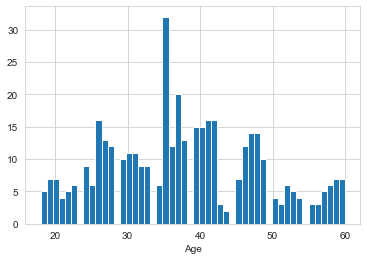

In [4]:
sns.set_style('whitegrid')
data['Age'].hist(bins=50)
plt.xlabel('Age')


#### Customers in age 25-48 years old are most probable to click 

Text(0.5, 0, 'Gender')

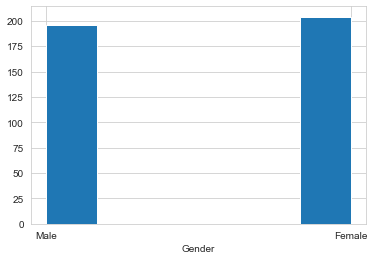

In [5]:
sns.set_style('whitegrid')
data['Gender'].hist(bins=6)
plt.xlabel('Gender')


### Female customers are much more clickable!!!

Text(0.5, 0, 'EstimatedSalary')

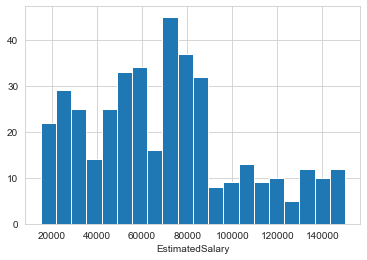

In [6]:
sns.set_style('whitegrid')
data['EstimatedSalary'].hist(bins=20)
plt.xlabel('EstimatedSalary')


### Most of customers' income is in 20000-90000$

## Feature Engineering

####  1-Convert the categorical variables into numerical form

In [7]:
Sex  = pd.get_dummies(data['Gender'] , drop_first = True)
Sex

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [8]:
data['Sex'] = Sex
data = data.drop('Gender' , axis =1)

In [9]:
data

,User ID,Age,EstimatedSalary,Purchased,Sex
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


#### 2. Standardize the data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()
ss.fit(data.drop('Purchased', axis =1 ))

StandardScaler()

In [12]:
scaled_featured = ss.transform( data.drop('Purchased', axis =1 ))
scaled_featured

array([[-0.93657932, -1.78179743, -1.49004624,  1.02020406],
       [ 1.66838653, -0.25358736, -1.46068138,  1.02020406],
       [-0.32087714, -1.11320552, -0.78528968, -0.98019606],
       ...,
       [-0.52039175,  1.17910958, -1.46068138, -0.98019606],
       [ 0.88695546, -0.15807423, -1.07893824,  1.02020406],
       [-1.36231017,  1.08359645, -0.99084367, -0.98019606]])

In [13]:
scale = pd.DataFrame( scaled_featured , columns = data.columns[:-1])

In [14]:
scale['Sex'] = scale['Purchased']
scale = scale.drop('Purchased'  ,axis =1)
scale

,User ID,Age,EstimatedSalary,Sex
0,-0.936579,-1.781797,-1.490046,1.020204
1,1.668387,-0.253587,-1.460681,1.020204
2,-0.320877,-1.113206,-0.785290,-0.980196
3,-1.233692,-1.017692,-0.374182,-0.980196
4,1.571389,-1.781797,0.183751,1.020204
...,...,...,...,...
395,0.004517,0.797057,-0.844019,-0.980196
396,0.203039,1.274623,-1.372587,1.020204
397,-0.520392,1.179110,-1.460681,-0.980196
398,0.886955,-0.158074,-1.078938,1.020204


## Models

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import orsvm

In [16]:
x = scale
y = data['Purchased']

npX = np.array(x).copy()
npy = np.array(y).copy()

X_train  ,X_test , y_train , y_test = train_test_split( x , y , test_size = 0.3 , random_state = 50)


In [17]:
clf_rf = RandomForestClassifier()
clf_dt = DecisionTreeClassifier()
clf_knn = KNeighborsClassifier()
clf_nb = GaussianNB()
clf_lr = LogisticRegression()
clf_svm = SVC() #RBF


In [18]:
Classifiers = ['RandomForest','DecisionTree','KNN','Naive Bayes','LogisticRegression','SVM']
scores = []
models = [clf_rf, clf_dt, clf_knn, clf_nb, clf_lr,clf_svm]
for model in models:
    score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [19]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)
mode

,score
SVM,0.8975
RandomForest,0.8925
KNN,0.8900
Naive Bayes,0.8725
LogisticRegression,0.8275
DecisionTree,0.8250


# ORSVM

In [20]:
X_train  ,X_test , y_train , y_test = train_test_split( x , y , test_size = 0.15 , random_state = 50)

## ORSVM  / Chebyshev Kernel

In [21]:
# Create an object from Model class of ORSVM
obj=orsvm.Model(kernel="Chebyshev",order=3,T=0.5,form='r')

In [22]:
# fit the model and Capture parameters
Weights, SupportVectors, Bias, KernelInstance = obj.ModelFit(X_train,y_train)

********** 17/08/2022 23:06:15 **********
** OSVM kernel: Chebyshev
** Order: 3
** Fractional mode, transition : 0.5


D:\Users\Samin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
D:\Users\Samin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


KeyError: 0

In [ ]:
# Model Prediction function
obj.ModelPredict(X_test,y_test,Bias,KernelInstance)